Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menu bar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menu bar, select Cell$\rightarrow$Run All).


Below, please fill in your name and collaborators, if any:

In [ ]:
NAME = "Varun Vijay"
COLLABORATORS = ""

# Assignment 4 - Classification

In this assignment, you will practice using the kNN (k-Nearest Neighbors) algorithm to solve a classification problem.
The kNN is a simple and robust classifier, which is used in different applications.

We will use the Iris dataset for this assignment.
The dataset was first introduced by statistician R. Fisher and consists of 50 observations from each of three species Iris (_Iris setosa_, _Iris virginica_ and _Iris versicolor_). For each sample, 4 features are given: the sepal length and width, and the petal length and width.

The goal is to train kNN algorithm to distinguish the species from one another.

1. The dataset can be downloaded from UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/.

2. Download `iris.data` file from the Data Folder. The Data Set description with the definitions of all the columns can be found on the dataset page - https://archive.ics.uci.edu/ml/datasets/Iris. Alternatively, you can import the data using sklearn.datasets. You will need to dowload both the sepal/petal data and the target variable information, then merge the two datasets.

3. _(1 points)_ Load the data from the file (`iris.data`) into the DataFrame. Set the names of columns according to the column definitions given in Data Description.

4. _(2 points)_ **Data inspection.**
    - Display the first 5 rows of the dataset and use any relevant functions that can help you to understand the data.
    - Prepare 2 scatter plots - `sepal_width` vs `sepal_length` and `petal_width` vs `petal_length`. Scatter plots should show each class in different color (`seaborn.lmplot` is recommended for plotting).

5. _(2 points)_ **Prepare the data for classification**.
    - Using the pandas operators prepare the feature variables `X` and the response `Y` for the fit. Note that `sklean` expects data as arrays, so convert extracted columns into arrays.

6. _(1 point)_ **Split** the data into `train` and `test` using `sklearn` `train_test_split` function.

7. _(2 points)_ **Run the fit** using `KNeighborsClassifier` from `sklearn.neighbors`.
    - First, instantiate the model,
    - Then, run the classifier on the training set.

8. _(3 points)_ Use learning model to **predict the class from features**, run prediction on `X` from test part.
    - Show the **accuracy score** of the prediction by comparing predicted iris classes and the `Y` values from the test.
    - Comparing these two arrays (predicted classes and test `Y`), count the numbers of correct predictions and predictions that were wrong. (**HINTS:** `NumPy` arrays can be compared using `==` operator. You can also use `NumPy`'s operator `count_nonzero` to count number of non-False values).

9. _(4 points)_ In this task, we want to see how accuracy score and the number of correct predictions change with the number of neighbors `k`. We will use the following **number of neighbors `k`: 1, 3, 5, 7, 10, 20, 30, 40, and 50**:
    - Generate 10 random train/test splits for each value of `k`
    - Fit the model for each split and generate predictions
    - Average the accuracy score for each `k`
    - Calculate the average number of correct predictions for each `k` as well
    - Plot the accuracy score for different values of `k`. What conclusion can you make based on the graph?


In [1]:
!wget https://archive.ics.uci.edu/static/public/53/iris.zip
!unzip iris.zip

--2023-08-22 15:35:35--  https://archive.ics.uci.edu/static/public/53/iris.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘iris.zip’

iris.zip                [ <=>                ]   3.65K  --.-KB/s    in 0s      

2023-08-22 15:35:35 (542 MB/s) - ‘iris.zip’ saved [3738]

Archive:  iris.zip
  inflating: Index                   
  inflating: bezdekIris.data         
  inflating: iris.data               
  inflating: iris.names              


**Custom Functions **

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris


In [ ]:
def K_N_Cls_train(data, y, numeric_features=[], cv=''):
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier


    #Preparing data for classification
    X = data.drop(y, axis=1).values
    Y = data[y].values

    # Spliting the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # a pipeline with ColumnTransformer and KNeighborsClassifier
    preprocessor = ColumnTransformer(
        transformers=[('num', StandardScaler(), numeric_features)])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())
    ])

    # the user input for k_values, or use default range 1-10
    k_input = input("Enter the K values separated by comma: ")
    if k_input:
        k_values = list(map(int, k_input.split(",")))
    else:
        k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]

    param_grid = {'knn__n_neighbors': k_values}
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv)

    # Fiting the GridSearchCV
    grid_search.fit(X_train, Y_train)

    # Geting the results
    results = grid_search.cv_results_

    # Plotting accuracy scores with larger figure
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, results['mean_test_score'], marker='+')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Average Accuracy Score')
    plt.title('Accuracy Score for Different k Values')
    plt.grid(True)
    plt.show()

    return grid_search

# Call the function
# K_N_Cls_train(data, 'class', numeric_features=[0, 1, 2, 3], cv=10)


In [ ]:
def K_N_Cls_test(data, y, numeric_features=[], cv=''):
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split, GridSearchCV
    from sklearn.compose import ColumnTransformer
    from sklearn.preprocessing import StandardScaler
    from sklearn.neighbors import KNeighborsClassifier


    #Preparing data for classification
    X = data.drop(y, axis=1).values
    Y = data[y].values

    # Spliting the data into train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

    # a pipeline with ColumnTransformer and KNeighborsClassifier
    preprocessor = ColumnTransformer(
        transformers=[('num', StandardScaler(), numeric_features)])

    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('knn', KNeighborsClassifier())
    ])

    # the user input for k_values, or use default range 1-10
    k_input = input("Enter the K values separated by comma: ")
    if k_input:
        k_values = list(map(int, k_input.split(",")))
    else:
        k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50]

    param_grid = {'knn__n_neighbors': k_values}
    grid_search = GridSearchCV(pipeline, param_grid, cv=cv)

    # Fiting the GridSearchCV
    grid_search.fit(X_test, Y_test)

    # Geting the results
    results = grid_search.cv_results_

    # Plotting accuracy scores with larger figure
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, results['mean_test_score'], marker='+')
    plt.xlabel('Number of Neighbors (k)')
    plt.ylabel('Average Accuracy Score')
    plt.title('Accuracy Score for Different k Values')
    plt.grid(True)
    plt.show()

    return grid_search

# Call the function
# K_N_Cls_test(data, 'class', numeric_features=[0, 1, 2, 3], cv=10)


In [ ]:
def s_p_w_s_L(data, x, y, x_1, y_1):
    # x  = sepal_width
    # y  = sepal_length
    # x_1= petal_width
    # y_1= petal_length
    # Scatter plot sepal_width vs sepal_length

    # Scatter plot sepal_width vs sepal_length
    sns.lmplot(x=x, y=y, hue='class', data=data, fit_reg=False)
    plt.title('Sepal Width vs Sepal Length')

    # Scatter plot petal_width vs petal_length
    sns.lmplot(x=x_1, y=y_1, hue='class', data=data, fit_reg=False)
    plt.title('Petal Width vs Petal Length')

    plt.show()
# Call this fucntion
# s_p_w_s_L(data, 'sepal_width', 'sepal_length', 'petal_width', 'petal_length')


In [ ]:
#______________________________________________________________________________________________________________________________________________________________________________________________________

In [4]:
data= pd.read_csv("/content/iris.data")

In [5]:
# Data download from sklearn

data=load_iris().data
target=load_iris().target
df_data=pd.DataFrame(data,columns=['sepal_length','sepal_width','petal_length','petal_width'])
df_target=pd.DataFrame(target,columns=['target'])

# Remember to merge the DataFrames into one after they are created.



**Question 3**



In [ ]:
import pandas as pd

# Column names as per the Data Description
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

# Load data into DataFrame
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(data_url, header=None, names=column_names)


**Question 4**

In [ ]:
data.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


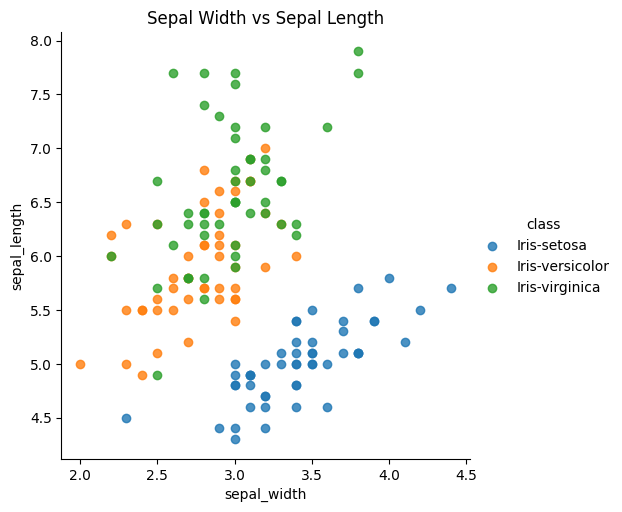

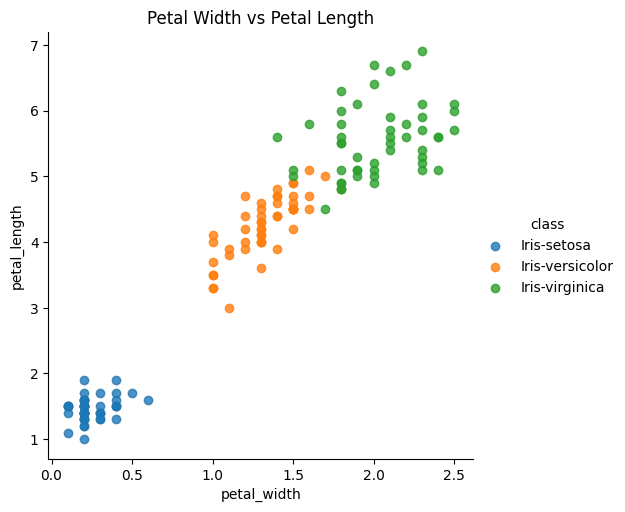

In [ ]:
s_p_w_s_L(data, 'sepal_width', 'sepal_length', 'petal_width', 'petal_length')


In [ ]:
Question

**Question 5,6,7,8,and 9.**

Enter the K values separated by spaces: 3


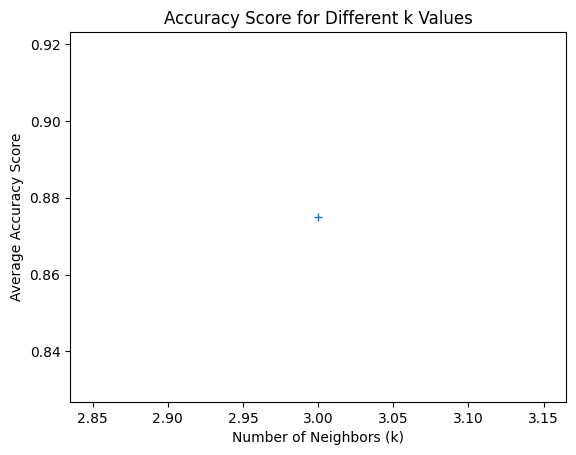

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2,
                                                                          3])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [3]})

In [ ]:
K_N_Cls_1(data, 'class', numeric_features=[0,1,2,3], cv=2)

In [ ]:
# Compare predicted classes with test Y values

correct_predictions = np.count_nonzero(Y_pred == Y_test)
wrong_predictions = len(Y_test) - correct_predictions

print(f'Correct Predictions: {correct_predictions}')
print(f'Wrong Predictions: {wrong_predictions}')


Correct Predictions: 30
Wrong Predictions: 0


Enter the K values separated by comma: 1,2,3,4,5,6,7,8,9,10,20,30,40,50


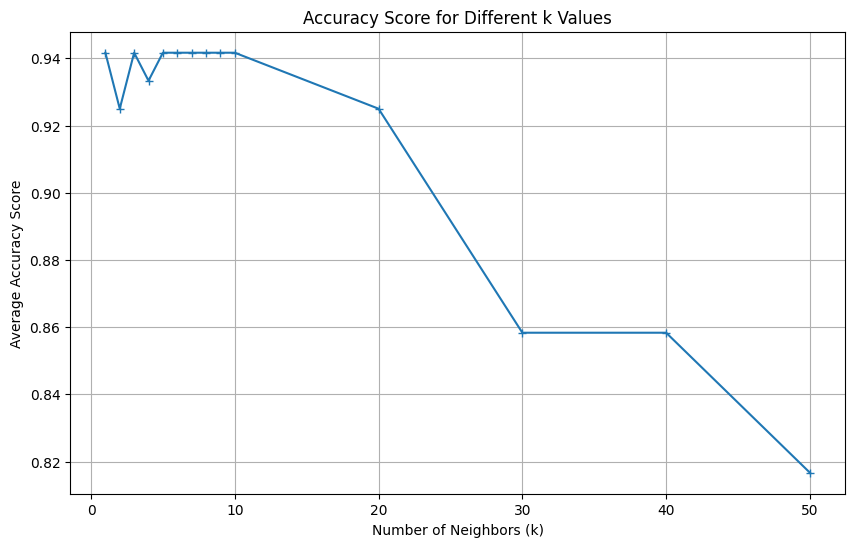

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2,
                                                                          3])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20,
                                              30, 40, 50]})

In [ ]:
K_N_Cls_train(data, 'class', numeric_features=[0, 1, 2, 3], cv=10)

Enter the K values separated by comma: 1, 3, 5, 7, 10, 20, 30, 40, 50


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 722, in score
    return self.steps[-1][1].score(Xt, y, **score_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 668, in score
    return accuracy_score(y,

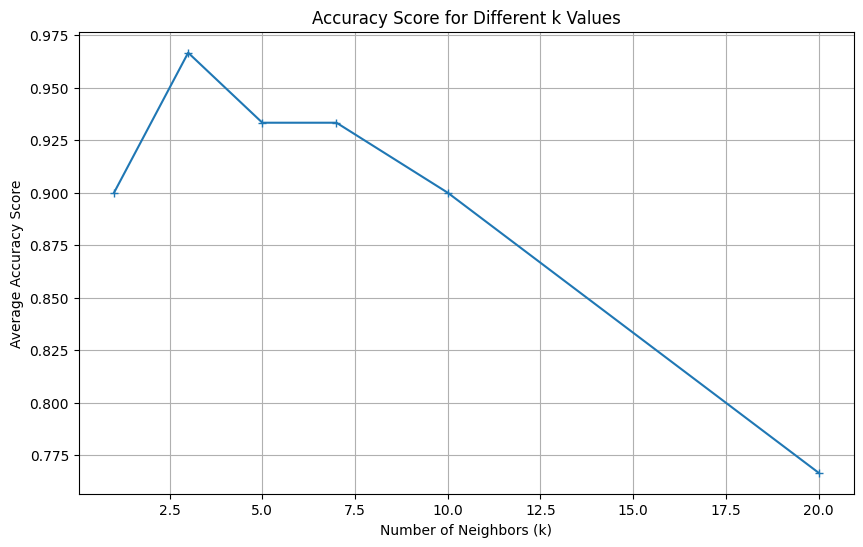

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         [0, 1,
                                                                          2,
                                                                          3])])),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 3, 5, 7, 10, 20, 30, 40, 50]})

In [ ]:
#Scores for the test data
K_N_Cls_test(data, 'class', numeric_features=[0, 1, 2, 3], cv=10)